# Physics 77/88 - Fall 2024 - Homework 5 
## Random Numbers I
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Oct 23rd 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Problem 1 (20P)

Write a function **random_machine.py** using *def* that simulates the following process: You start with a set of $N$ dice all showing the same number, i. e. pips or *states*, face up (see image below). Now, you pick one die randomly and roll it and put it back. In the next step you pick a die randomly again, roll it and put it back and so on.

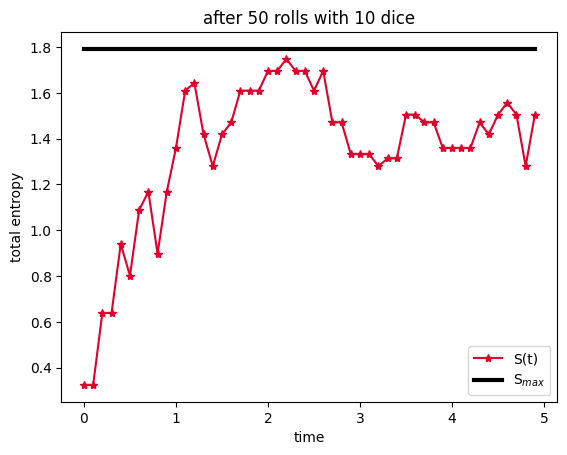

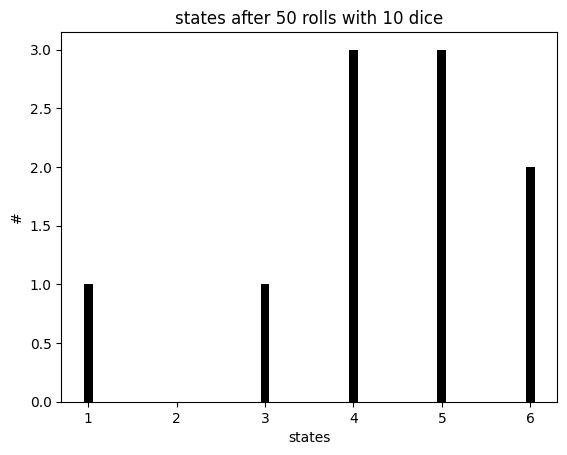

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the dice system and calculate entropy at each step
def random_machine(N, rolls):
    # Initialize all dice to show the same number (1)
    dice = np.ones(N, dtype=int)
    #dice = np.random.randint(1, 7, N)
    
    # Array to store entropy at each time step
    entropies = np.empty(rolls)

    for i in range(rolls):
        # Randomly select a die and roll it
        dice[np.random.randint(0, N)] = np.random.randint(1, 7)
        
        # Count occurrences of each face (1 to 6)
        counts = np.bincount(dice, minlength=7)[1:]  # ignore index 0
        probabilities = counts / N  # calculate probabilities for each face
        
        # Calculate entropy S using the formula
        non_zero_probs = probabilities[probabilities > 0]  # avoid log(0)
        entropy = -np.sum(non_zero_probs * np.log(non_zero_probs))
        
        # Store the entropy
        entropies[i] = entropy

    # Array to store times of rolls
    time_steps = np.arange(0, rolls/10, 0.1)

    # Array to plot max entropy
    max_entropy = np.repeat(np.log(6), rolls)

    # Plot Entropy against time
    fig, ax = plt.subplots()
    ax.plot(time_steps, entropies, color = '#DF002B', marker = '*', label = 'S(t)')
    ax.plot(time_steps, max_entropy, color = 'k', label = 'S$_{max}$', linewidth = '3')
    ax.set_xlabel('time')
    ax.set_ylabel('total entropy')
    ax.set_title(f'after {rolls} rolls with {N} dice')
    ax.legend(loc = 'lower right')

    # Possible Rolls
    roll_plot = np.arange(1, 7)

    fig2, ax2 = plt.subplots()
    ax2.bar(roll_plot, counts, width = 0.1, color = 'k')
    ax2.set_xlabel('states')
    ax2.set_ylabel('#')
    ax2.set_title(f'states after {rolls} rolls with {N} dice')



N = 10   # Number of dice
rolls = 50  # Number of time steps

random_machine(N, rolls)

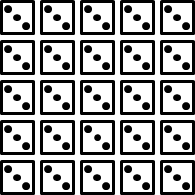

For each time step, calculate the **Entropy S** <br>
<br>
$S = - \Sigma_{i=1}^{6}\,\,p_i\, ln(p_i)$<br>
<br>
of the system, where $p_i = n_i/N$<br>
<br>
with $n_i$ being the number of those dice showing the number $i$ face up (= having the same state *i*) at the particular time step $t$.<br>
<br>
The function also generates a plot of $S$ over time, compared to the maximum value of $S = ln(6)$, similar to the figure below:<br>
<br>
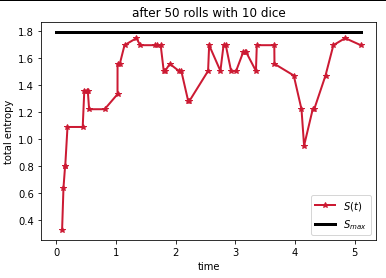
<br>
and a histogram of the states of the dice after $M$ rolls, like e.g. in the figure below:<br>
<br>
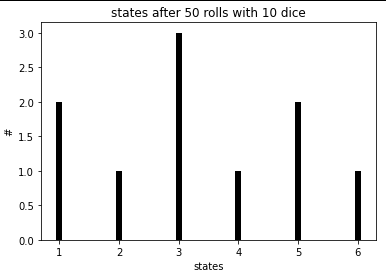
<br>
The number of dice $N$ and the number of rolls $M$, which is equivalent to the number of time steps, should both be input arguments.<br>
 - How does the entropy $S$ evolve in time for small $N = 5, 10, 15$ and for large $N>100$?<br>
 - How do you interpret this behaviour, what are possible conclusions?<br>
 - How does the entropy $S$ evolve in time if you start with a random configuration of the dice's states?

For small $N$, the entropy $S$ appears to generally increase as a negative exponential with time but has a significant amount of randomness. For large $N > 100$, the entropy appears to increase linearly with time (assuming the time stays short). As the time (and number of rolls) increases, the entropy agaifollows a negative exponential, approaching the value of maximum entropy.

This assumes that for relatively short time periods, entropy increases linearly (consistent with the taylor approximation of $-e^{-t} = C + t - \ldots$ for small values $t$.) For small $N$, the patterns are much more heavily dictated by probabilistic fluctuations and thus appears more random. As time continues, it shows that the entropy levels off at the value $S_{max}$

If you start with a random configuration, the entropy already begins around its maximum and stays relatively constant.